## KNN - Predict Diabetes

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


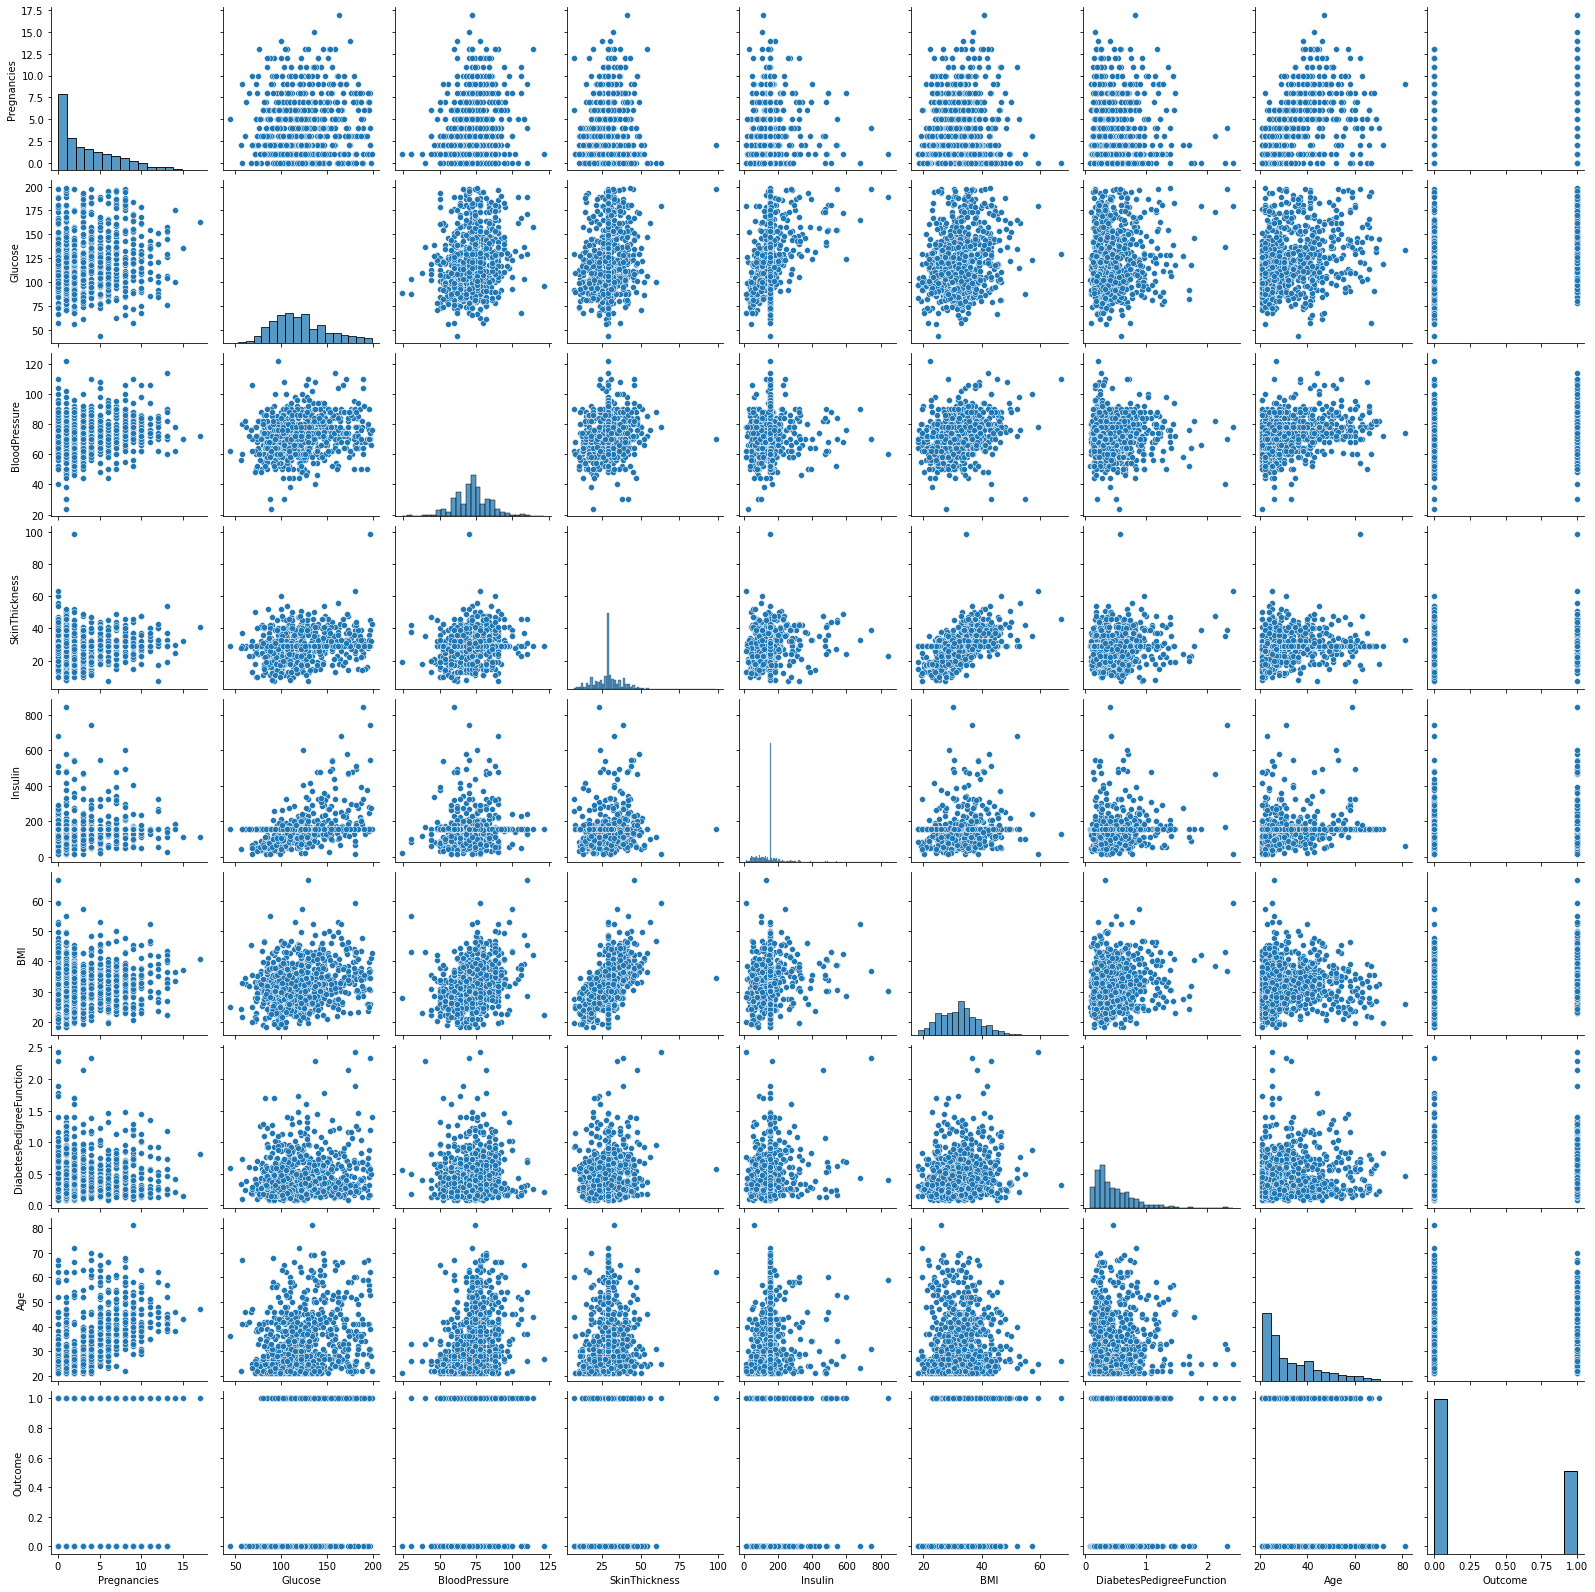

In [34]:
sns.pairplot(df)

In [4]:
# Replace zeros
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for column in zero_not_accepted:
    df[column] = df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN,mean)

In [7]:
# Splitting dataset
X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [28]:
pred = knn.predict(X_test)

In [29]:
print(confusion_matrix(y_test,pred))

[[150  20]
 [ 39  45]]


In [30]:
print(f1_score(y_test,pred))

0.6040268456375838


In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       170
           1       0.69      0.54      0.60        84

    accuracy                           0.77       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.76      0.77      0.76       254

